### Visualizations

After harvesting, preprocessing, cleaning and filtering the data, the data set is ready for some analysis. This script concludes some of the most promenent and important analysis. At the end we will draw some conclusions based on these visulizations and discuss what could be done better next attempt and what is already working properly. 

#### Getting started 
At first we start with some basics to start analyzes. Thus, importing packages, setting the working directory, importing the data set.

In [21]:
#Import packages
import pandas as pd
import re
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import pandas as pd   


#Check working directory
os.getcwd()

#Read data set
tweets = pd.read_csv('tweets_historic_full_text_FINAL.csv')

#Check the output of the script and if all data is included
pd.set_option('display.max_columns', None)
pd.DataFrame(tweets.head())


,id,user_description,user_location,text,id_str,created,retweet_count,city,date,text_eng,neg,neu,pos,compound,sentiment
0,394,"Open, eerlijk , transparant","amsterdam, nederland",vanaf 15 mei quarantaineplicht bij aankomst ui...,1382689775170289666,2021-04-15 13:38:26,0,Amsterdam,2021-04-15,"from 15 May, quarantine obligation upon arriva...",0.115,0.816,0.069,-0.3612,negative
1,793,Observing this #plutocracy. Gezondheid lijkt v...,"van galenbuurt, amsterdam",hier heb ik een half jaar moeten wachten op ee...,1382679111039123456,2021-04-15 12:56:03,0,Amsterdam,2021-04-15,here I had to wait six months for a new indica...,0.141,0.772,0.087,-0.1779,negative
2,797,• vrouw • liberaal •,'s-gravenhage & utrecht,voor een zelftest naar een particuliere testst...,1382678924954591236,2021-04-15 12:55:19,0,Utrecht,2021-04-15,for a self-test to a private test lane? #coron...,0.000,1.000,0.000,0.0000,neutral
3,803,Kan niet tegen onrecht Probeer de waarheid te ...,"utrecht, nederland","er snel nog even een miljard doorheen jassen, ...",1382678534292901888,2021-04-15 12:53:46,0,Utrecht,2021-04-15,"a billion more quickly, for which poor Netherl...",0.331,0.669,0.000,-0.8849,negative
4,804,https://t.co/PKtZwEPWDf\nCouchsurfer\nPolarste...,"rotterdam blijdorp, nederland",die afname in 2020 komt toch 'gewoon' door cor...,1382678530929070080,2021-04-15 12:53:45,0,Rotterdam,2021-04-15,"that decrease in 2020 is 'just' due to corona,...",0.000,1.000,0.000,0.0000,neutral


#### Overview of Numbers 

After these basic preparations we can start with viewing some general numbers and facts. For starting analysis it is nice to view the total amount of tweets sent, the amount of tweets per city/day/sentiment and counting the most used works from the sentiment study. Moreover, it was important to know how many duplicates were in the dataset. In the preprocessing process we tried to filter on diplicates, but we have to check whether it is working. The two chunks of code below show that all the Tweet ID's (id_str) are unique, but that there are 135 tweets that seem to contain the exact same text in the tweet. The table after the unique values presents the total amount of tweets divided over the cities.

In [2]:
# Total of 4862 tweets of the four major Dutch cities, that are all unique
tweets['id_str'].nunique(),len(tweets)

(4862, 4862)

In [30]:
# Total of 4862 tweets of the four major Dutch cities, that are all unique
tweets['text'].nunique(),len(tweets)

(4727, 4862)

In [3]:
#Total amount of tweets sent per city
pd.DataFrame(tweets['city'].value_counts())

,city
Amsterdam,2491
Rotterdam,993
Utrecht,775
Den Haag,603


Secondly we wanted to gain an overview of the overall tweets that are collected. So, below you find the fact that all the tweets are unique, the total amount of tweets per city, sentiment and date.

In [4]:
# Total amount of tweets sent per sentiment
pd.DataFrame(tweets['sentiment'].value_counts())

,sentiment
negative,1987
positive,1846
neutral,1029


In [5]:
# Total amount of tweets sent per day
pd.DataFrame(tweets['date'].value_counts().sort_index())

,date
2021-04-08,264
2021-04-09,653
2021-04-10,540
2021-04-11,689
2021-04-12,736
2021-04-13,917
2021-04-14,706
2021-04-15,357


In order to analyse tweets per city specificly we created four separated data sets that contain only the tweets of that specific city, as this makes the analysis clearer and easier in writing the codes. The table below shows the amount of tweets per sentiment divided by the four majour cities. It is clear that Amsterdam and Rotterdam released relatively more negative than positive tweets, and that Den Haag and Utrecht sent more positve than negative tweets. Overall, every city sends almost twice as much positive/negative content, than neutral posts.


In [6]:
#create new data sets for every city

#Asmterdam
tweets_amsterdam = tweets[tweets["city"] == "Amsterdam"]

#Rotterdam
tweets_rotterdam = tweets[tweets["city"] == "Rotterdam"]

# Den Haag
tweets_denhaag = tweets[tweets["city"] == "Den Haag"]

# Utrecht
tweets_utrecht = tweets[tweets["city"] == "Utrecht"]


In [9]:
senti_frame = pd.concat([pd.DataFrame(tweets_amsterdam['sentiment'].value_counts()), 
           pd.DataFrame(tweets_rotterdam['sentiment'].value_counts()), 
           pd.DataFrame(tweets_denhaag['sentiment'].value_counts()), 
           pd.DataFrame(tweets_utrecht['sentiment'].value_counts())], 
           axis = 1)

senti_frame.columns = ["Amsterdam", "Rotterdam", "Den Haag", "Utrecht"]

senti_frame

,Amsterdam,Rotterdam,Den Haag,Utrecht
negative,1016,437,232,302
positive,908,358,258,322
neutral,567,198,113,151


#### Visualizations and graphs
The next step is to implement the facts and numbers to analyse the data. We will perform this analyses by plotting the tweets based on the varying cities, sentiments and dates. First of all we plotted the sentiment of the four major cities for a full week. The first visualization is a box plot in which the diffent bar plots show the three varying sentiments, positive, negative and neutral valued tweets. Although, due to the limited amount of data, non of the bars are significant higher than other, we can see that tweets sent from Amsterdam tent to be the most negative and the least positive. Utrecht and Den Haag seem, on first sight, to show similar tweeting behaviour in the limited data set we collected. In general the graphs do strenghten the conclusions drawn from the numbers about the positive and negative tweets in the cities. 

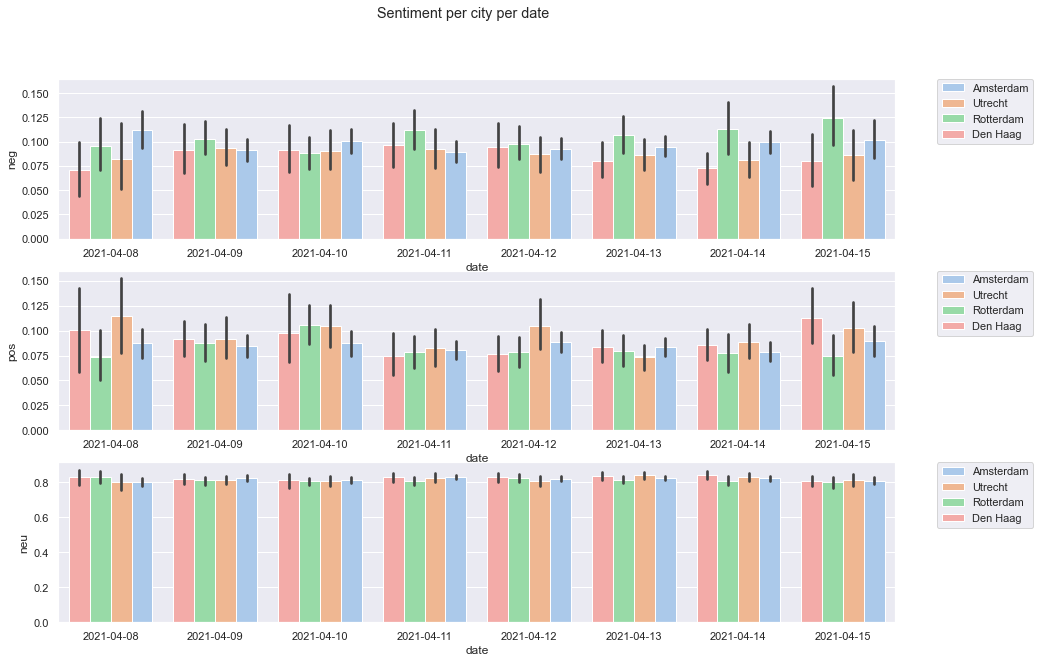

In [9]:
#Box plots how three varying sentiments are dividided over time in four major Dutch cities

#Set plot layout
sns.set(rc={'figure.figsize':(15,10)})
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
fig.suptitle('Sentiment per city per date')
palette = sns.color_palette("pastel")

barplot_neg = sns.barplot(ax=axes[0], x="date", y="neg", hue="city", data=tweets, palette=palette)
barplot_neg.invert_xaxis()
barplot_neg.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

barplot_pos = sns.barplot(ax=axes[1], x="date", y="pos", hue="city", data=tweets, palette=palette)
barplot_pos.invert_xaxis()
barplot_pos.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

barplot_neu = sns.barplot(ax=axes[2], x="date", y="neu", hue="city", data=tweets, palette=palette)
barplot_neu.invert_xaxis()
barplot_neu.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

When the relation between sentiments per city throughout the week is analysed in a line plot, the graps below is the result. It contains more or less the same information. However, it is visualized alternatively. We decided to visualize the confidence interval, based on bootstrapping from our data set, as this shows that none of are outcomes can be defined as significant. Interpreting the graph becomes harder, however it is important to stipulate that the limited data set we created is interesting, but not sufficient enough for significant conclusions. 

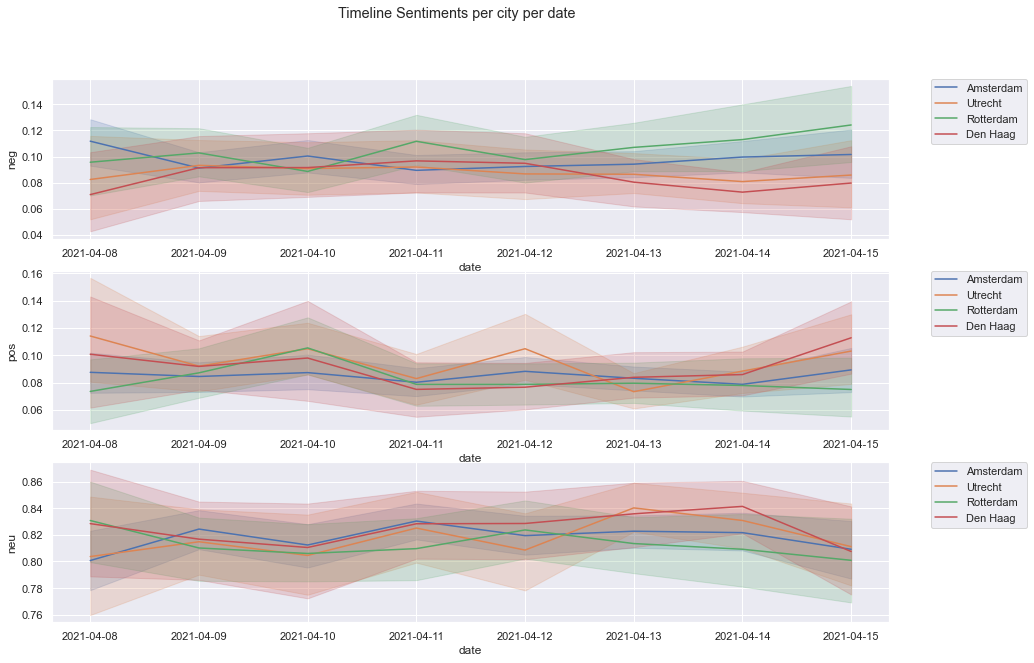

In [121]:
# Time line of three varying sentiments in major Dutch cities

#Set plot layout
sns.set(rc={'figure.figsize':(15, 15)})
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
fig.suptitle('Timeline Sentiments per city per date')

lineplot_neg = (sns.lineplotax=axes[0], x="date", y="neg", hue="city", data=tweets, palette= "deep")
lineplot_neg.invert_xaxis()
lineplot_neg.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

lineplot_pos = sns.lineplot(ax=axes[1], x="date", y="pos", hue="city", data=tweets, palette="deep")
lineplot_pos.invert_xaxis()
lineplot_pos.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

lineplot_neu = sns.lineplot(ax=axes[2], x="date", y="neu", hue="city", data=tweets, palette="deep")
lineplot_neu.invert_xaxis()
lineplot_neu.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

A second boxplot shows the total amount of tweets per day for a specific city. For this city the total amount of tweets are divided by the sentiment that they contain. In Amsterdam you can see for example that the amount of tweets is higher on April 13th and 14th. This could have to do with the pressconference that the minister president gave on April 13th. 

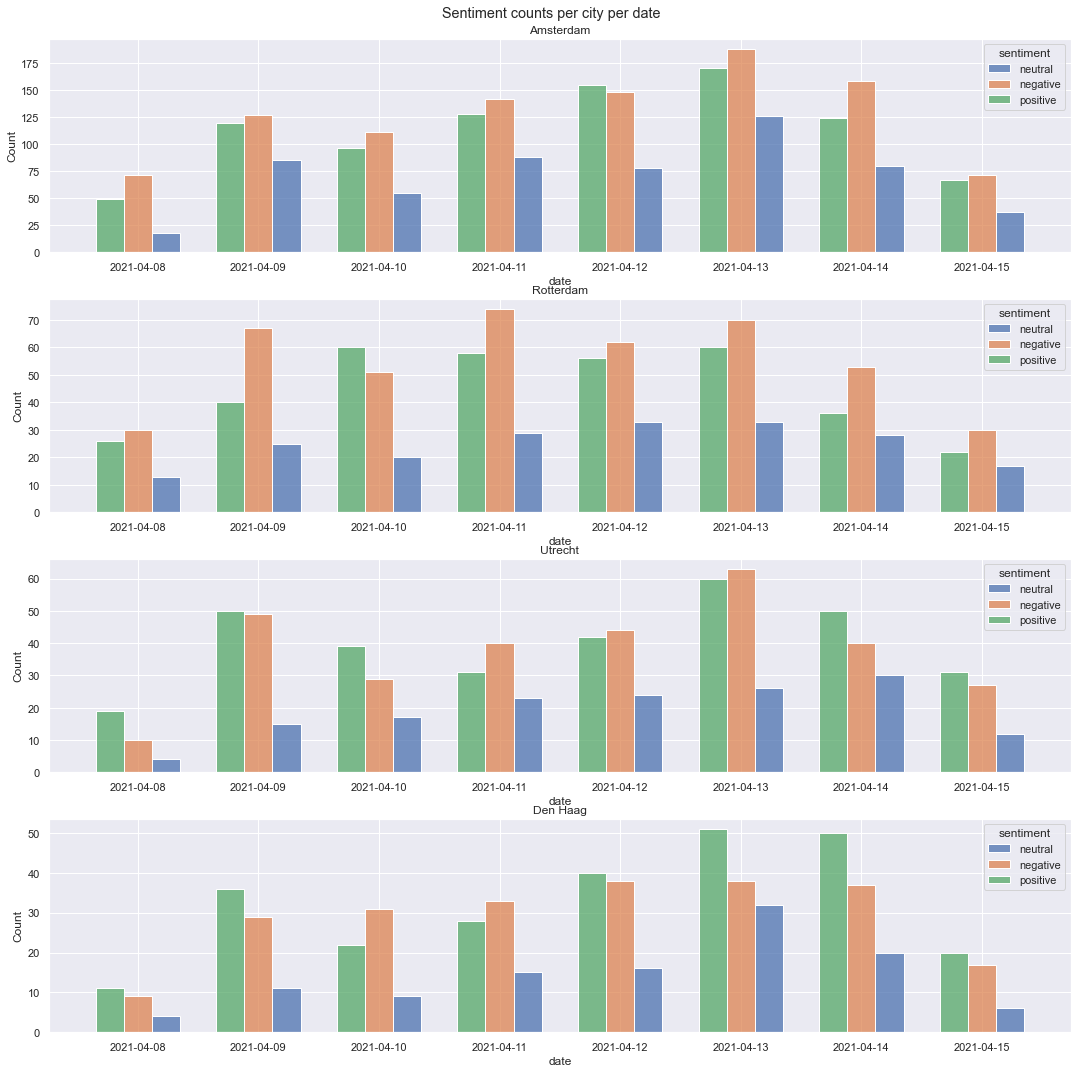

In [35]:
sns.set(rc={'figure.figsize':(15, 15)})
fig, axes = plt.subplots(4, 1, figsize=(15, 15))
fig.suptitle('Sentiment counts per city per date')

axes[0].set_title("Amsterdam")
axes[1].set_title("Rotterdam")
axes[2].set_title("Utrecht")
axes[3].set_title("Den Haag")
 
plt.tight_layout()

barplot_ams = sns.histplot(ax = axes[0], data=tweets_amsterdam, x="date", hue="sentiment", multiple="dodge", shrink=.7,  palette="deep", hue_order=["neutral", "negative", "positive"])
barplot_ams.invert_xaxis()

barplot_rot = sns.histplot(ax = axes[1], data=tweets_rotterdam, x="date", hue="sentiment", multiple="dodge", shrink=.7, palette="deep", hue_order=["neutral", "negative", "positive"])
barplot_rot.invert_xaxis()

barplot_dnh = sns.histplot(ax = axes[2], data=tweets_utrecht, x="date", hue="sentiment", multiple="dodge", shrink=.7, palette="deep", hue_order=["neutral", "negative", "positive"])
barplot_dnh.invert_xaxis()

barplot_utr = sns.histplot(ax = axes[3], data=tweets_denhaag, x="date", hue="sentiment", multiple="dodge", shrink=.7, palette="deep", hue_order=["neutral", "negative", "positive"])
barplot_utr.invert_xaxis()


Thirdly, we analysed the sentiments based on a radar chart. This chart is set up to display the relative frequency of sentiments of each city. Initially, the relative values of Amsterdam are used to create the chart. Eventually, the add_to_radar-function is used to add the relative values for the other three cities. We can concluded that Amsterdam relatively sent the most negatively connotated tweets and Utrecht sent relatively most positive tweets.

In [22]:
#returning relative frequency of sentiment
rel_frq_AMS = tweets[tweets["city"] == "Amsterdam"]['sentiment'].value_counts(normalize = True).sort_index()
rel_frq_DEN = tweets[tweets["city"] == "Den Haag"]['sentiment'].value_counts(normalize = True).sort_index()
rel_frq_ROT = tweets[tweets["city"] == "Rotterdam"]['sentiment'].value_counts(normalize = True).sort_index()
rel_frq_UTR = tweets[tweets["city"] == "Utrecht"]['sentiment'].value_counts(normalize = True).sort_index()

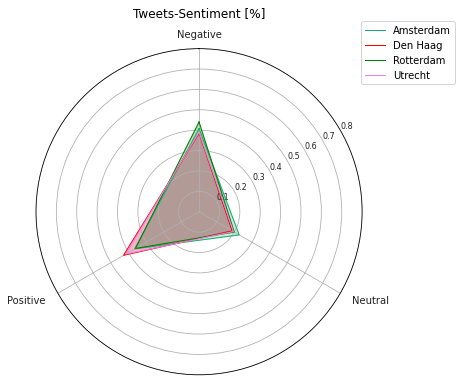

In [23]:
#PLOTTING
#source: https://www.pythoncharts.com/matplotlib/radar-charts/

#Define function for adding cities to radar-chart
def add_to_radar(rel_frq: np.array, city: str,  color):
  values = list(rel_frq.values)
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=1, label=city)
  ax.fill(angles, values, color=color, alpha=0.25)



# Each attribute we'll plot in the radar chart.
labels = ['Negative', 'Neutral', 'Positive']

#Use Amsterdam to intialise radar-chart.
values = list(rel_frq_AMS.values)

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()


# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
values += values[:1]
angles += angles[:1]

# prepare the figure
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw the outline of our data.
ax.plot(angles, values, color='#1aaf6b', linewidth=1, label = 'Amsterdam')
# Fill it in.
ax.fill(angles, values, color='#1aaf6c', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)


# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles[0:3]), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(0, 0.8)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
#ax.grid(color='#ABC')
# Change the color of the outermost gridline (the spine).
#ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
#ax.set_facecolor('#FAFAFA')

#chart title
ax.set_title('Tweets-Sentiment [%]', y=1.08)

#add cities
add_to_radar(rel_frq_DEN, 'Den Haag', color='red')
add_to_radar(rel_frq_ROT, 'Rotterdam', color='green')
add_to_radar(rel_frq_UTR, 'Utrecht', color='violet')

#legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

pos_text = tweets[tweets['sentiment'] == 'positive']['text_eng'].values
neg_text = tweets[tweets['sentiment'] == 'negative']['text_eng'].values
neu_text = tweets[tweets['sentiment'] == 'neutral']['text_eng'].values


pos_wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(pos_text))

neg_wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(neg_text))

neu_wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(neu_text))

'''
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')

plt.imshow(pos_wordcloud, interpolation = 'bilinear')
plt.imshow(neg_wordcloud, interpolation = 'bilinear')
plt.imshow(neu_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
'''



"\nfig = plt.figure(\n    figsize = (40, 30),\n    facecolor = 'k',\n    edgecolor = 'k')\n\nplt.imshow(pos_wordcloud, interpolation = 'bilinear')\nplt.imshow(neg_wordcloud, interpolation = 'bilinear')\nplt.imshow(neu_wordcloud, interpolation = 'bilinear')\nplt.axis('off')\nplt.tight_layout(pad=0)\nplt.show()\n"

Lastly, we implemended a wordcloud that showed the most occuring words in tweets. This is to give an impression of what the urban citizens tweeded most about. In this wordcloud some small standard words are exlcuded, as these would otherwise occur the most withou any meaning. Some words are to be expacted as corona and vaccine. However, some other are quite surpising, such as south, flight and Eric. 

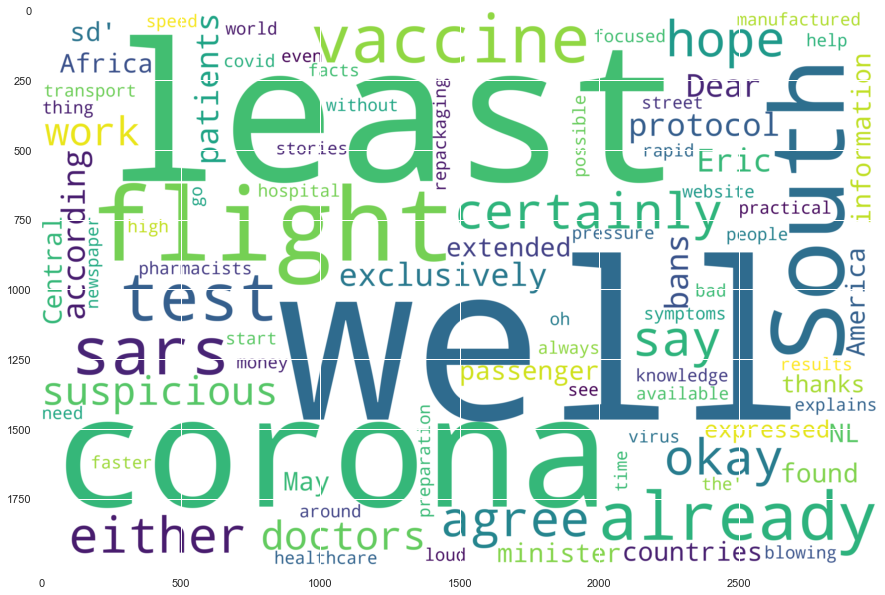

In [32]:
plt.imshow(pos_wordcloud, interpolation = 'bilinear')

#### Discussion
First of all, after the visualiations we can conlcude that our data set is not extensive enough to examine propor data analysis. The relationships of sentiments in specific cities is not significant, compared to the other three cities. The confidence intervals that are displayed in the box and line plots are based on the bootstrapping methods, which creates test batches out of the orinigal training data set. With a larger data set we expect the data to be more significant and the confidence intervals to decrease. 

Secondly, we wanted to see if you could recoignise certain events that happended based on the Tweet content and amount of tweets sent. For most cities it seems that the aftermath of the pressconference is displayed in tweeting behaviour. However, many other factors that we are not aware of yet could influence the data as welk.However, we still assume there is potential in this function of the sentiment analysis, when multiple specific events are anaylised when the data set is enlarged. After more in dept analysis, we assume that more statistical significant conclusions could be drawn. 

Thirdly, for the sentiment analysis it is important to notice that in this particular pandemic case the sentiment of words can differ. We are aware of the fact that this is always the case for sentiment analysis, but probably more in this specific corona case the words 'positive' and 'negative' could relate to the positive of negative outcome of test. For the sentiment analysis 'positive' is a positive sentiment, while a positive test results is a negative event in real life. Deeper analysis will be needed see if more of these flaws can be recoignized. Ideally, we would write a sentiment algorithm specific for the corona pandemic. However, for this small study this was not worth the effort and too time consuming. 

#### Discussion
Overall we think that the study was interesting, especially as the sentiments divided quite a bit per city. The visualizations showed that the cities of Den Haag and Utrecht were generally more positive than Amsterdam and Rotterdam. Moreover, it seems that the pressconference of the minister president influences the twitter behaviour, which can already be concluded from this small size data set. Lastly, we can conclude that just one week of corona related tweets already consists of qutie some information about the four major cities of the Netherlands. Therefore, we think that a study like this can be interesting and draw significant conclusion when executed on a large scale and for a longer period of time. 